In [1]:
import os, pandas as pd, numpy as np

In [2]:
os.chdir("E:/R/Assignment A1a")

In [3]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [4]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [8]:
CHTSD = df[df['state_1']=="CHTSD"]

In [9]:
CHTSD.isnull().sum().sort_values(ascending = False)

soyabean_q        2169
soyabean_v        2169
Meals_Employer    2138
Meals_School      2133
Meals_Payment     2073
                  ... 
palak_q              0
carrot_q             0
radish_q             0
brinjal_q            0
fv_tot               0
Length: 384, dtype: int64

In [8]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [10]:
CHTSD_new = CHTSD[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [12]:
CHTSD_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       32
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [13]:
CHTSD_clean = CHTSD_new.copy()

In [14]:
CHTSD_clean.loc[:, 'Meals_At_Home'] = CHTSD_clean['Meals_At_Home'].fillna(CHTSD_new['Meals_At_Home'].mean())

In [15]:
CHTSD_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [16]:
# Outlier Checking

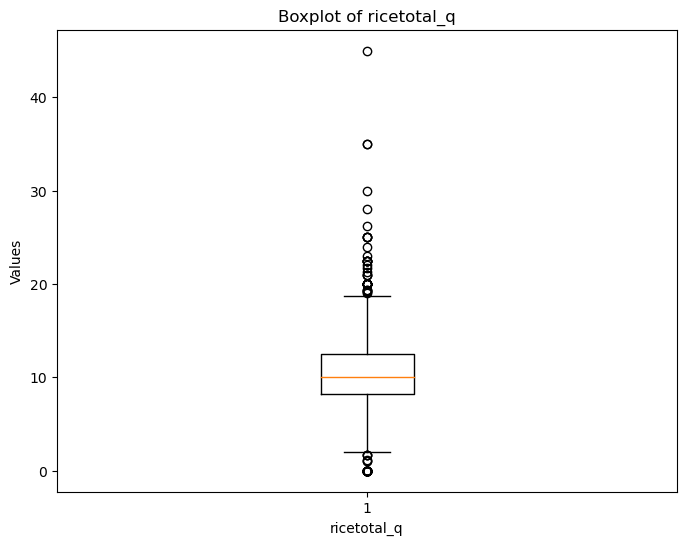

In [17]:
import matplotlib.pyplot as plt
# Assuming CHTSD_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(CHTSD_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [18]:
rice1 = CHTSD_clean['ricetotal_q'].quantile(0.25)
rice2 = CHTSD_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [19]:
CHTSD_clean=CHTSD_new[(CHTSD_new['ricetotal_q']<=up_limit)&(CHTSD_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2025706c410>,
 'caps': [<matplotlib.lines.Line2D at 0x2025706db50>,
 'boxes': [<matplotlib.lines.Line2D at 0x20257067650>],
 'medians': [<matplotlib.lines.Line2D at 0x2025706f0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2025706fb90>],
 'means': []}

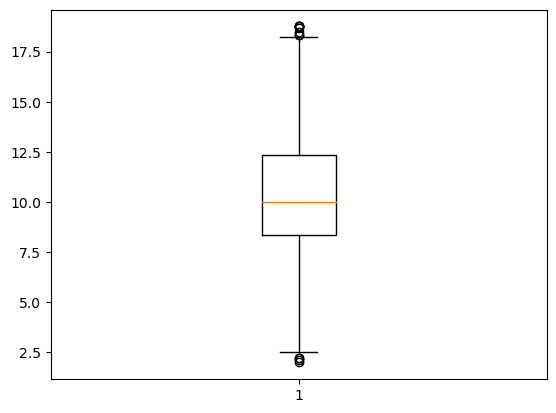

In [20]:
plt.boxplot(CHTSD_clean['ricetotal_q'])

In [21]:
CHTSD_clean['District'].unique()

array([10,  7,  8,  9,  6, 11,  5,  4,  3,  2,  1, 14, 13, 12, 15, 16, 17,
       18], dtype=int64)

In [22]:
# Replace values in the 'Sector' column
CHTSD_clean.loc[:,'Sector'] = CHTSD_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [23]:
#total consumption

In [24]:
CHTSD_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [27]:
#CHTSD_clean.loc[:, 'total_consumption'] = CHTSD_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [26]:
CHTSD_clean.loc[:, 'total_consumption'] = CHTSD_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

# Check the result
print(CHTSD_clean)

      state_1  District Sector  Region  State_Region  ricetotal_q  \
1357    CHTSD        10  RURAL       2           222     6.000000   
1358    CHTSD        10  RURAL       2           222     3.750000   
1359    CHTSD        10  RURAL       2           222     5.000000   
1360    CHTSD        10  RURAL       2           222     4.166667   
1361    CHTSD        10  RURAL       2           222     5.000000   
...       ...       ...    ...     ...           ...          ...   
83738   CHTSD         2  URBAN       1           221    17.000000   
83739   CHTSD         2  URBAN       1           221    13.750000   
83740   CHTSD         2  URBAN       1           221    16.333333   
83741   CHTSD         2  URBAN       1           221    14.333333   
83742   CHTSD         2  URBAN       1           221    14.400000   

       wheattotal_q  moong_q  Milktotal_q  chicken_q   bread_q  foodtotal_q  \
1357       4.000000      0.0            0       0.60  0.000000    28.850510   
1358       5.

In [28]:
CHTSD_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
1357,CHTSD,10,RURAL,2,222,6.000000,4.000000,0.0,0,0.60,0.0,28.850510,50.000000,60.0,89.450510
1358,CHTSD,10,RURAL,2,222,3.750000,5.000000,0.0,0,0.25,0.0,25.762998,50.000000,54.0,84.762997
1359,CHTSD,10,RURAL,2,222,5.000000,3.750000,0.0,0,0.75,0.0,18.925525,26.250000,60.0,54.675525
1360,CHTSD,10,RURAL,2,222,4.166667,1.666667,0.0,0,0.50,0.0,19.583819,33.333333,60.0,59.250486
1361,CHTSD,10,RURAL,2,222,5.000000,1.750000,0.0,0,0.00,0.0,19.262790,20.000000,40.0,46.012790


In [29]:
CHTSD_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              15.380365  43.920182  134.694228  19.451233
2              28.569877  50.785423  324.101410  15.571618
3              24.767925  50.977889  283.401220  17.041878

In [30]:
CHTSD_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                21.307476  49.021748  134.694228  30.467332
2                12.335071  42.174192  117.743645  19.451233
3                20.924782  47.941695  116.700295  17.125113
4                30.998920  55.638822  232.431630  17.964384
5                26.475133  45.760712  209.350233  22.333458
6                28.894613  51.629625  178.925212  15.571618
7                24.453251  47.441163  193.434323  22.764429
8                20.616718  48.515356  118.300375  16.000075
9                18.455411  45.311146  108.510255  16.472256
10               21.827113  47.017988  156.556612  18.500250
11               41.597321  58.393469  324.101410  21.164574
12               29.714716  56.489025  201.600500  17.833543
13               24.587237  50.926369  154.926640  18.135811
14               19.406717  51.688464  119.433704  19.208116
15               28.841613  49.083278  283.401220  18.650073
16               24.768838  53.928302  129.420455  17.041878
17               20.538071  46.363387  123.433667  18.260275
18               25.886162  57.913332  133.895828  29.720156

In [31]:
total_consumption_by_districtcode=CHTSD_clean.groupby('District')['total_consumption'].sum()

In [32]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
11    14481.580224
10    11660.461096
7      8397.085884
Name: total_consumption, dtype: float64

In [34]:
CHTSD_clean.loc[:,"District"] = CHTSD_clean.loc[:,"District"].replace({11: "Raipur", 10: "Durg", 7: "Bilaspur"})

In [35]:
total_consumption_by_districtname=CHTSD_clean.groupby('District')['total_consumption'].sum()

In [36]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Raipur      14481.580224
Durg        11660.461096
Bilaspur     8397.085884
Name: total_consumption, dtype: float64

In [37]:
from statsmodels.stats import weightstats as stests

In [38]:
rural=CHTSD_clean[CHTSD_clean['Sector']=="RURAL"]
urban=CHTSD_clean[CHTSD_clean['Sector']=="URBAN"]

In [39]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
1357,CHTSD,Durg,RURAL,2,222,6.000000,4.000000,0.0,0,0.60,0.0,28.850510,50.000000,60.0,89.450510
1358,CHTSD,Durg,RURAL,2,222,3.750000,5.000000,0.0,0,0.25,0.0,25.762998,50.000000,54.0,84.762997
1359,CHTSD,Durg,RURAL,2,222,5.000000,3.750000,0.0,0,0.75,0.0,18.925525,26.250000,60.0,54.675525
1360,CHTSD,Durg,RURAL,2,222,4.166667,1.666667,0.0,0,0.50,0.0,19.583819,33.333333,60.0,59.250486
1361,CHTSD,Durg,RURAL,2,222,5.000000,1.750000,0.0,0,0.00,0.0,19.262790,20.000000,40.0,46.012790


In [40]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
81076,CHTSD,15,URBAN,3,223,12.500000,0.0,0.0,0,0.000000,0.0,20.725275,0.000000,60.0,33.225275
81077,CHTSD,15,URBAN,3,223,12.000000,0.0,0.0,0,0.000000,0.0,22.300310,10.000000,60.0,44.300310
81078,CHTSD,15,URBAN,3,223,13.750000,0.0,0.0,0,0.000000,0.0,22.400294,5.000000,52.0,41.150294
81079,CHTSD,15,URBAN,3,223,9.666667,0.0,0.0,0,0.083333,0.0,14.893572,5.833333,56.0,30.476905
81080,CHTSD,15,URBAN,3,223,13.000000,0.0,0.0,0,0.000000,0.0,27.400615,0.000000,89.0,40.400615


In [41]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [42]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 10.731151639791962
P-Value: 7.268461728661492e-27
